<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week9/Week9_Keras_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Keras to build a "simple" dense neural network 

In [1]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON TENSORFLOW TUTORIALS (2019)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import backend as K
K.image_data_format()

import matplotlib.pyplot as plt
import time


In [2]:
# My test to make sure TF is working
# Updated for TF 2 - Hat tip to @Casey Mok

hello = tf.constant('Hello, TensorFlow!')
tf.print(hello)


Hello, TensorFlow!


In [3]:
# WHAT TYPE OF GPU ARE YOU USING
!nvidia-smi

Thu Sep  1 23:07:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    33W / 250W |    391MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
# OBTAIN - THERE ARE MANY WAYS TO OBTAIN MNIST - THIS IS ONE

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

print(X_train.shape)

Rows: 60000, columns: 28
Rows: 10000, columns: 28
(60000, 28, 28)


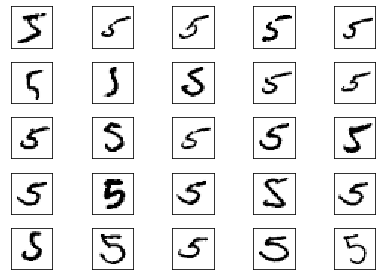

In [18]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 5

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [19]:
# SCRUB - FLATTENING FROM 28 x 28 TO 784
# THERE ARE MANY WAYS TO RESHAPE - THIS IS ONE

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print(X_train.shape)


(60000, 784)


In [20]:
# SCRUB - NORMALIZE INTENSITY VALUE

X_train = X_train / 255
X_test = X_test / 255

In [21]:
# SCRUB - ENCODE FOR LABEL

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
# MODEL - BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The following code actually runs the model - notice small number of epochs & lack of auto-stopping rule!

NOTE:  This is where the GPU comes in handy - running on CPU will take about 40 seconds - not bad but switching the runtime to GPU should bring the runtime down to ~ 15 secs!

In [23]:
# MODEL - FIT THE BASE MODEL

start = time.time()  # TRACK TIME

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# MODEL - RESULTS

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/10
300/300 - 3s - loss: 0.2800 - accuracy: 0.9202 - val_loss: 0.1351 - val_accuracy: 0.9599 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1103 - accuracy: 0.9681 - val_loss: 0.0935 - val_accuracy: 0.9716 - 736ms/epoch - 2ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0708 - accuracy: 0.9796 - val_loss: 0.0770 - val_accuracy: 0.9754 - 725ms/epoch - 2ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0492 - accuracy: 0.9860 - val_loss: 0.0737 - val_accuracy: 0.9768 - 710ms/epoch - 2ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0360 - accuracy: 0.9897 - val_loss: 0.0672 - val_accuracy: 0.9779 - 657ms/epoch - 2ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0262 - accuracy: 0.9934 - val_loss: 0.0562 - val_accuracy: 0.9824 - 646ms/epoch - 2ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0196 - accuracy: 0.9952 - val_loss: 0.0643 - val_accuracy: 0.9799 - 684ms/epoch - 2ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.0572 - val_accuracy: 0.9820 - 664ms/epoch - 2ms/step
Ep

In [24]:
# MODEL - TWO WAYS TO VISUALIZE

# tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1903 - accuracy: 0.9428 - val_loss: 0.1138 - val_accuracy: 0.9642
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.0740 - val_accuracy: 0.9772
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0745 - val_accuracy: 0.9762
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0794 - val_accuracy: 0.9771
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0664 - val_accuracy: 0.9813
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0717 - val_accuracy: 0.9800
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0687 - val_ac

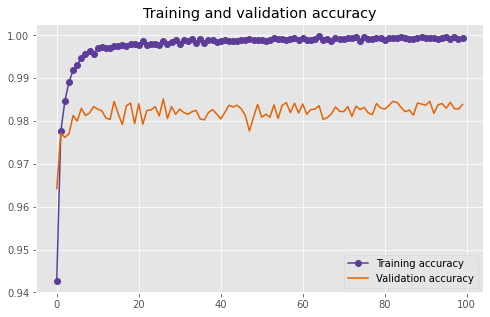

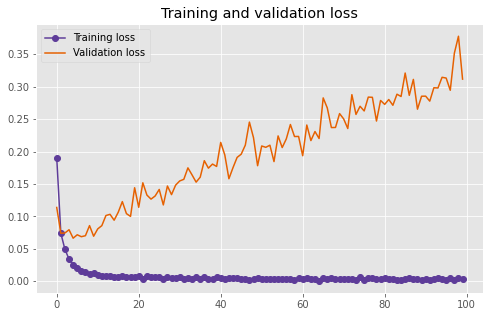

In [26]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

Now let us explore if adding some layers to the model can we fix that weird validation line above?


In [27]:
# MODEL - ADD DROPOUT LAYER

def updated_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # DROPOUT LAYER - SHOULD REDUCE OVERFITTING
    model.add(Dropout(0.15))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # COMPILE MODEL
    # OPTIMIZER - SGD
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

NOTE:  In the model above - we added the dropout layer - in the code below, we mention changing batch_size but we keep @ 200 so our comparisons are the proverbial "apples to apples" 

In [28]:
# MODEL - FIT - https://keras.io/models/model/

start = time.time()  # TRACK TIME

model = updated_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)  

# BATCH SIZE CAN HELP WITH MEMORY - HOWEVER SMALLER BATCH MIGHT REDUCE ACCURACY
# NUMBER OF EPOCHS IS NUMBER OF TIMES THROUGH NETWORK   

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/10
300/300 - 1s - loss: 1.2166 - accuracy: 0.7042 - val_loss: 0.6998 - val_accuracy: 0.8511 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.6185 - accuracy: 0.8509 - val_loss: 0.4954 - val_accuracy: 0.8800 - 686ms/epoch - 2ms/step
Epoch 3/10
300/300 - 1s - loss: 0.4912 - accuracy: 0.8722 - val_loss: 0.4192 - val_accuracy: 0.8921 - 651ms/epoch - 2ms/step
Epoch 4/10
300/300 - 1s - loss: 0.4336 - accuracy: 0.8834 - val_loss: 0.3777 - val_accuracy: 0.9011 - 729ms/epoch - 2ms/step
Epoch 5/10
300/300 - 1s - loss: 0.3987 - accuracy: 0.8902 - val_loss: 0.3515 - val_accuracy: 0.9067 - 727ms/epoch - 2ms/step
Epoch 6/10
300/300 - 1s - loss: 0.3751 - accuracy: 0.8965 - val_loss: 0.3323 - val_accuracy: 0.9110 - 656ms/epoch - 2ms/step
Epoch 7/10
300/300 - 1s - loss: 0.3576 - accuracy: 0.9011 - val_loss: 0.3173 - val_accuracy: 0.9142 - 732ms/epoch - 2ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3428 - accuracy: 0.9050 - val_loss: 0.3061 - val_accuracy: 0.9167 - 729ms/epoch - 2ms/step
Epo

In [ ]:
# MODEL - TWO WAYS TO VISUALIZE

# tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())

# NOTICE NO CHANGE TO TOTAL NUMBER OF PARAMETERS

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# MODEL
# RUN THE MODEL

model = updated_model()

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5926 - accuracy: 0.8453 - val_loss: 0.3256 - val_accuracy: 0.9110
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3235 - accuracy: 0.9095 - val_loss: 0.2674 - val_accuracy: 0.9248
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9225 - val_loss: 0.2341 - val_accuracy: 0.9344
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2420 - accuracy: 0.9315 - val_loss: 0.2110 - val_accuracy: 0.9411
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2191 - accuracy: 0.9384 - val_loss: 0.1930 - val_accuracy: 0.9451
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2001 - accuracy: 0.9442 - val_loss: 0.1794 - val_accuracy: 0.9497
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1845 - accuracy: 0.9488 - val_loss: 0.1658 - val_ac

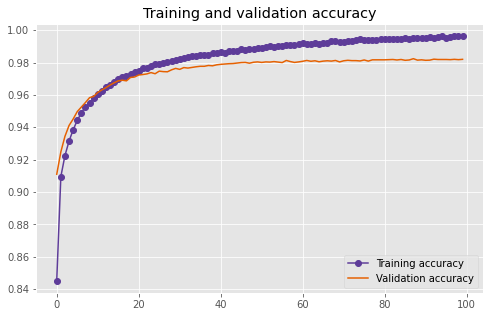

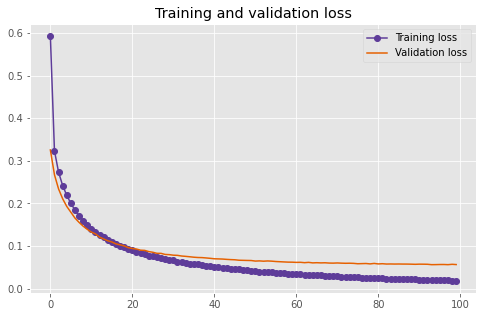

In [30]:
# INTERPRET 
# DID ADDING DROPOUT FUNCTION HELP WITH OVERFITTING?

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)